In [10]:
## Import functions
from Functions.TA_PY_Packages import *
from Functions.TA_ODE import *
from Functions.TA_Series import *
from Functions.TA_Plots import *

## LOGO AND NAME
ntbk           = 'FSR_Transient_analysis'
prdw_logo_path = r'C:\Users\fjsaez\Documents\pyPRDW\Documentation\PRDW_logo\Logo_PRDW_350x90px.png'

## DATA

In [2]:
path_files = Path.cwd()                # Main path
path_results = path_files / 'Results'

## -----------------------------------------------------------------------------
## General parameters
## -----------------------------------------------------------------------------
params = {
    'D': 1.684,                         # [m] pipeline diameter (internal) PN8 - SDR21
    'L': 850,                           # [m] pipeline length
    'f': 0.04,                         # Darcy friction factor 
    'n': 1,                             # Number of pipes
    'dtq': 0,                           # [s] time lag for 2nd pump start
    'Q_total': 3.8,                   # [m3/s] total flowrate ALWAYS PUT POSITIVE VALUE
    'swl':0,                           # [m] Still water level at the sea
    'plots': 'Y',                       # 'Y'/'N' plot results?
    'disch_type':0,                     # 0: pipe flow in any direction
                                        # 1: pipe flow seaward only (diffuser with check valves)
}

params['A'] = 78/params['n']       # [m^2] reservoir surface area
params['Q'] = params['Q_total']/params['n']        # [m^3/s] constant flowrate into the reservoir


## -----------------------------------------------------------------------------
## Time parameters
## -----------------------------------------------------------------------------
params['dt'] = 0.5                        # [s] default time step
params['ti'] = 0                        # [s] initial analysis time
params['tf'] = 3600                     # [s] final analysis time, 3600 s for dt 2min or 7200 s for trip


## -----------------------------------------------------------------------------
## Additional parameters
## -----------------------------------------------------------------------------
params['g']      = 9.81
params['alpha']  = params['A']/(0.25*np.pi*params['D']**2)
params['w']      = np.sqrt(params['g']/(params['alpha']*params['L']))
params['lmda']   = params['alpha']*params['f']/(2*params['D'])   # 2 instead of pi to match Darcy friction factor definition
params['Tn']     = 2*np.pi/params['w']
params['tau']    = np.arange(params['ti'], params['tf']+params['dt'], params['dt'])
params['ltau']   = len(params['tau'])

## -----------------------------------------------------------------------------
## Pressure parameters
## -----------------------------------------------------------------------------
params['patm'] = 1.013*10**5
params['zcp']  = -3.0
params['lcp']  = 9
params['kav']  = -0.94

In [4]:
# Conditions to simulate### AGREGAR CONDICION DE INGRESAS q_filename txt
q_filename = flowrate_timeserie(params, 
                                number_pumps = 6,                          # Number of pumps
                                delta_time   = 300,                        # seconds between pumps start
                                system       = 'Intake',                   # System: 'Intake' / 'Outfall'
                                serie_type   = 'trip')         # serie of flowrate: 'sequential_start' / 'abrupt_start' /'trip'

w_filename = ''

outfile    = 'RT_Case_1.txt'

## Analysis

### Time dependence functions

In [5]:
eta, q = read_files(path_files,             
                    params, 
                    w_filename, 
                    q_filename)         
dq = diff_q(params, q)

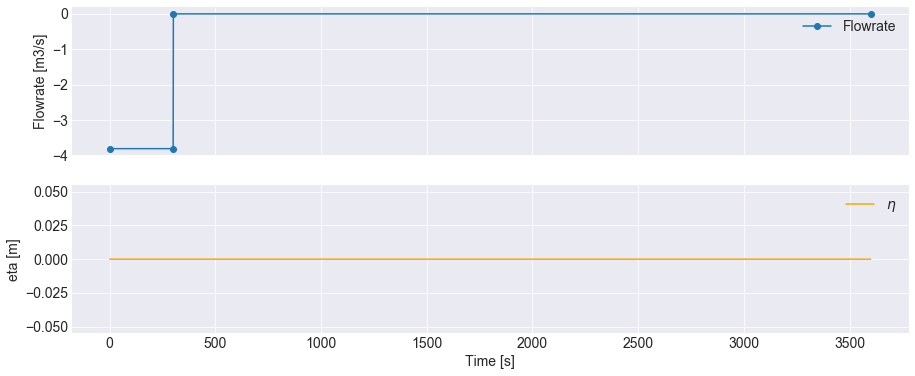

In [6]:
plot_initial_flowrate_eta(params, q_filename, eta, figsize=(15,6), fsize=14)

### Initial conditions: level and velocity

In [7]:
y01, y02 = initial_conditions(params, eta, q, conditions='trip')  # condition: 'sequential_start' / 'abrupt_start' /'trip'

### ODE SOLVER

In [8]:
## Boundary conditions
y0 = [y01, y02]

sol = solve_ODE(params, eta, q, dq, y0)

# Evalúa la solución en puntos de tiempo específicos
z = sol.sol(params['tau']).T[:,0]

dzdt, pcp, dpcp, maxdpcp = pressure_at_control_point(params, z, eta, q)

In [11]:
print_outputs(params, eta, z, q, dzdt, pcp, maxdpcp, savetxt=False)

TypeError: print_outputs() got an unexpected keyword argument 'savetxt'

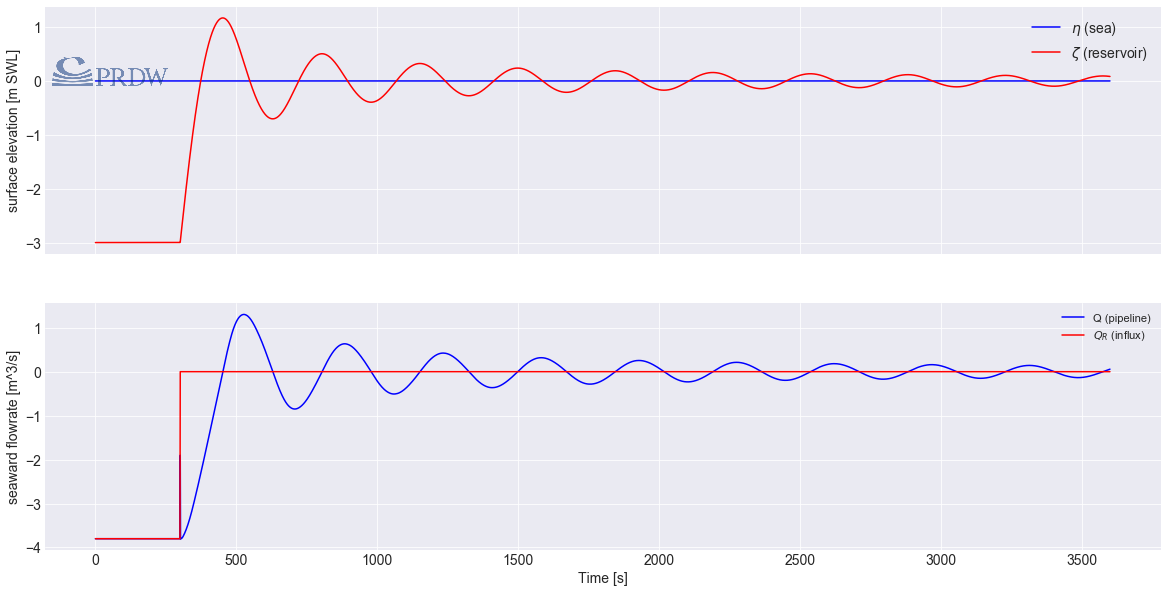

In [139]:
plot_results(params, z, eta, q, dzdt, pcp, plot_press=False, save=False, pathout=path_results, 
             name='Sequential_start_intake', prdw_logo_path=prdw_logo_path, figsize=[0.13, 0.75, 0.08, 0.08], window=20)